In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('netflix_titles_2021.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.shape


(8807, 12)

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [11]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [12]:
result  = pd.concat( [df.nunique() , df.count()] , axis=1, keys= ['Unique values', 'Count'])
result

,Unique values,Count
show_id,8807,8807
type,2,8807
title,8807,8807
director,4528,6173
cast,7692,7982
country,748,7976
date_added,1767,8797
release_year,74,8807
rating,17,8803
duration,220,8804


In [13]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

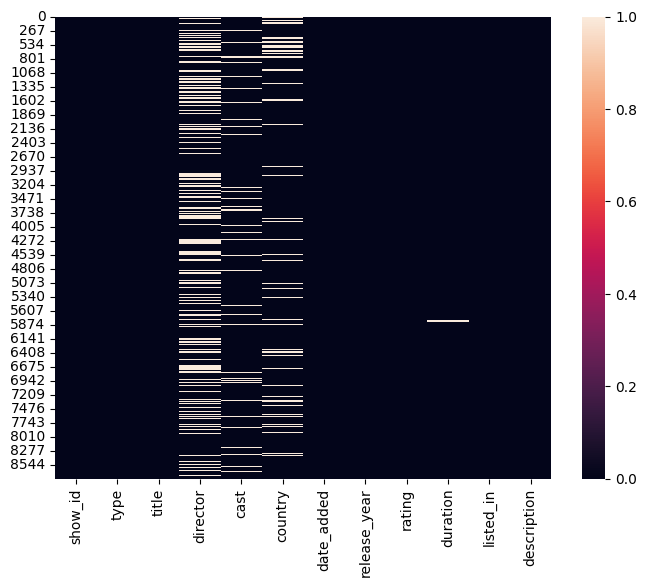

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())
plt.show()

In [15]:
new_df = df.copy()
new_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
new_df.fillna( {'director' : 'missing' , 
                'cast' : 'missing' ,
                'country' : 'missing' ,  
                'duration' : 'missing',
                'rating' : 'missing'} , inplace=True)
new_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [17]:
new_df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [18]:


df[df.duplicated()]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [19]:
number = new_df['type'].value_counts().to_frame('Count')
number

,Count
type,
Movie,6131
TV Show,2676


<BarContainer object of 2 artists>

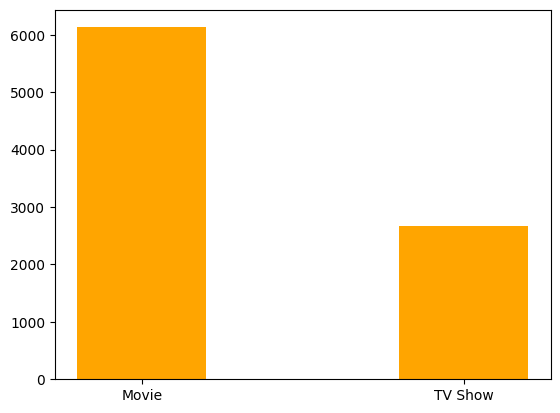

In [20]:
plt.bar(new_df['type'].unique() ,new_df['type'].value_counts() , width=0.4, color='orange')

In [21]:
new_df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y')

In [22]:
new_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [23]:
new_df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [24]:
new_df['month'] = new_df['date_added'].dt.month
new_df['year_added'] = new_df['date_added'].dt.year

In [25]:
new_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,2021.0
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,2021.0


In [26]:

new_df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
month                  float64
year_added             float64
dtype: object

In [27]:
selected = ['release_year','month','year_added']
new_df[selected].corr()

,release_year,month,year_added
release_year,1.000000,-0.039179,0.111531
month,-0.039179,1.000000,-0.160421
year_added,0.111531,-0.160421,1.000000


<Axes: >

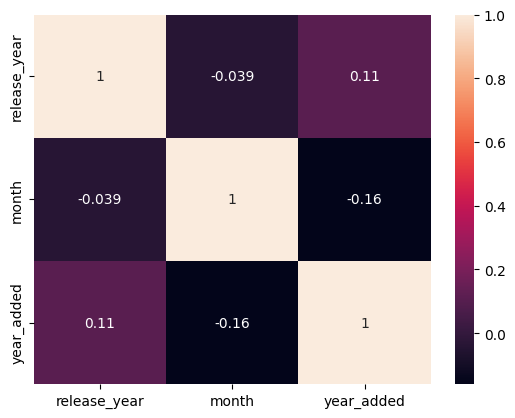

In [28]:
sns.heatmap(new_df[selected].corr() , annot=True)

In [29]:
ratings_given = new_df.rating.value_counts()
ratings_unique = new_df.rating.nunique()
ratings_given, ratings_unique 

(rating
 TV-MA       3207
 TV-14       2160
 TV-PG        863
 R            799
 PG-13        490
 TV-Y7        334
 TV-Y         307
 PG           287
 TV-G         220
 NR            80
 G             41
 TV-Y7-FV       6
 missing        4
 NC-17          3
 UR             3
 74 min         1
 84 min         1
 66 min         1
 Name: count, dtype: int64,
 18)

In [ ]:
colors = ['blue', 'green', 'orange', 'red']
plt.figure(figsize=(14,6))
plt.bar(new_df.rating.unique() , ratings_given, color=colors)

In [ ]:
print(new_df['listed_in'].str.count(',').max())

In [ ]:
new_df[['Genre 1', 'Genre 2', 'Genre 3']] = new_df['listed_in'].str.split(',', expand=True)

In [ ]:
new_df.head(3)

In [ ]:
Gen1 = new_df['Genre 1'].value_counts()
Gen1 = Gen1.reset_index()
Gen1.columns = ['Category', 'Count']
Gen1.head()

In [ ]:
Gen2 =new_df['Genre 2'].value_counts()
Gen2 = Gen2.reset_index()
Gen2.columns = ['Category', 'Count']
Gen2.head()

In [ ]:
Gen3 =new_df['Genre 3'].value_counts()
Gen3 = Gen3.reset_index()
Gen3.columns = ['Category', 'Count']
Gen3.head()

In [ ]:
Gen1['Category'] = Gen1.Category.str.strip()
Gen2['Category'] = Gen2.Category.str.strip()
Gen3['Category'] = Gen3.Category.str.strip()

In [ ]:
genre_merge = pd.merge(pd.merge(Gen1,Gen2,on='Category'),Gen3,on='Category')

In [ ]:
genre_merge['Total_Count'] = genre_merge['Count_x'] + genre_merge['Count_y'] + genre_merge['Count'] 
genre_merge.drop(['Count_x','Count_y','Count'] , axis=1 , inplace=True)

In [ ]:
result = genre_merge.sort_values(by= 'Total_Count' , ascending=False)
result = result.head()
result

In [ ]:
plt.figure(figsize=(14,6))
plt.bar(result.Category, result.Total_Count , color='orange')

In [ ]:
new_df.head()

In [ ]:
movies_year = new_df['release_year'].value_counts().sort_values(ascending=False).head()
movies_year 

In [ ]:
plt.bar(movies_year.index , movies_year.values)

In [ ]:
result = new_df[new_df['title'] == '365 Days']
result[['show_id' , 'director']]

In [ ]:
result = new_df[new_df['country'] == 'India']
result[['title']]

In [ ]:
director = new_df.director.value_counts().head(11)
director = director.drop('missing' , axis=0)
director

In [ ]:
director.plot(kind='bar')

In [ ]:
new_df.head(2)

In [ ]:
actor = new_df[new_df['cast'].str.contains('Leonardo DiCaprio')]
actor

In [ ]:
actor.shape

In [ ]:
new_df[(new_df.rating == 'TV-14') & (new_df.country == 'India')]